<a href="https://colab.research.google.com/github/Junrulin0225/Medical-Text-Cancer-Type-Classification/blob/main/Medical_Text_xRay_Report_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🗂️ Welcome to my Medical & Chest x-Ray Report Classification System!**

In this project, we want to clean the data from

*   Medical Text from doctors
*   Chest X-Ray Report

and predict the classification.



# **👩‍⚕️ Medical Text Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [ ]:
df_med = pd.read_csv('Medical Text Dataset(cancer type class).csv',encoding='latin1', quoting=csv.QUOTE_NONE)  #There is single quote mark
df_med.head()


,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""""""" The adopted strategy was the same as that ..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [ ]:
df_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7600 non-null   object
 1   0           7570 non-null   object
 2   a           7570 non-null   object
dtypes: object(3)
memory usage: 178.2+ KB


In [ ]:
df_med.columns

Index(['Unnamed: 0', '0', 'a'], dtype='object')

In [ ]:
df_med.columns=['id','cancer_type','text']
df_med.head()

,id,cancer_type,text
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""""""" The adopted strategy was the same as that ..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [ ]:
df_med.drop(columns='id', axis=1, inplace=True)

In [ ]:
df_med.cancer_type.value_counts()

Thyroid_Cancer    2810
Colon_Cancer      2580
Lung_Cancer       2180
Name: cancer_type, dtype: int64

<Axes: xlabel='cancer_type', ylabel='count'>

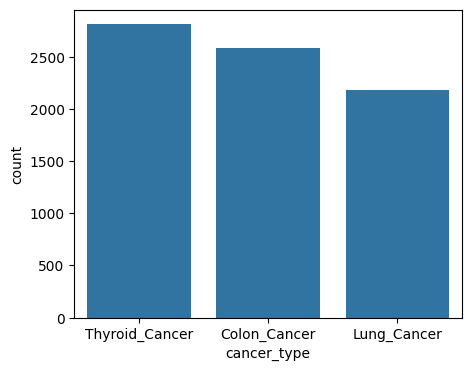

In [ ]:
plt.figure(figsize = (5,4))
sns.countplot(x= df_med.cancer_type)

In [ ]:
df_med.isnull().sum()

cancer_type    30
text           30
dtype: int64

In [ ]:
df_med.shape

(7600, 2)

In [ ]:
df_med.dropna(inplace=True)

In [ ]:
df_med.shape

(7570, 2)

For encoding categorical value, I chose to use **condition** this time. It is easier for me to keep track what cancer type is which number.

In [ ]:
# Convert cancer type into numeric form with conditions (similar to lambda function)
def condition(x):
    if x=='Thyroid_Cancer':
        return 0
    elif x=='Colon_Cancer':
        return 1
    else:
        return 2

# Applying the conditions
df_med.cancer_type = df_med.cancer_type.apply(condition)

In [ ]:
df_med.cancer_type.value_counts()

0    2810
1    2580
2    2180
Name: cancer_type, dtype: int64

**Text preprocessing using NLTK**

Steps :

1. convert all the characters to lower case

2. remove unwanted space,... (non english characters)

3. remove special characters

4. before removing stopwords, tokenize the text into words

5. build stop word list

6. print out the whole text without stopwords

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.svm import SVC

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def clean_text(text):
  # convert all the characters to lower case
  text = text.lower()
  # remove unwanted space,... (non english characters)
  text = re.sub(r'[^a-zA-Z+]',' ', text)
  # remove special characters (e.g. !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~)
  text = ''.join([i for i in text if i not in string.punctuation])
  # before removing stopwords, tokenize the text into words
  word_list = word_tokenize(text)
  # stop word list
  stop_word_list = stopwords.words('english')
  #print out the whole text without stopwords
  text = ' '.join([i for i in word_list if i not in stop_word_list])
  return text

Since the text data is huge, I decided to move the post-processing text into a new csv file.

In [ ]:
df_med.text = df_med.text.apply(clean_text)
df_med.head().to_csv('Medical_Text_after_cleaning.csv')
print('file1 created!')

file1 created!


This step is to keep track of character, word and sentence counts after text processing.

In [ ]:
from nltk import sent_tokenize
df_med['character_count']=df_med['text'].str.len()
df_med['word_count']=df_med['text'].apply(lambda x:len(word_tokenize(x)))
df_med['sentence_count']=df_med['text'].apply(lambda x:len(sent_tokenize(x)))
df_med.head()

,cancer_type,text,character_count,word_count,sentence_count
0,0,thyroid surgery children single institution os...,16357,2026,1
1,0,adopted strategy used prior years based four e...,13443,1681,1
2,0,coronary arterybypass grafting thrombosis brin...,17765,2173,1
3,0,solitary plasmacytoma sp skull uncommon clinic...,11421,1303,1
4,0,study aimed investigate serum matrix metallopr...,19572,2171,1


Visualizing words that occur the most. (The size of words reflects its frequency)

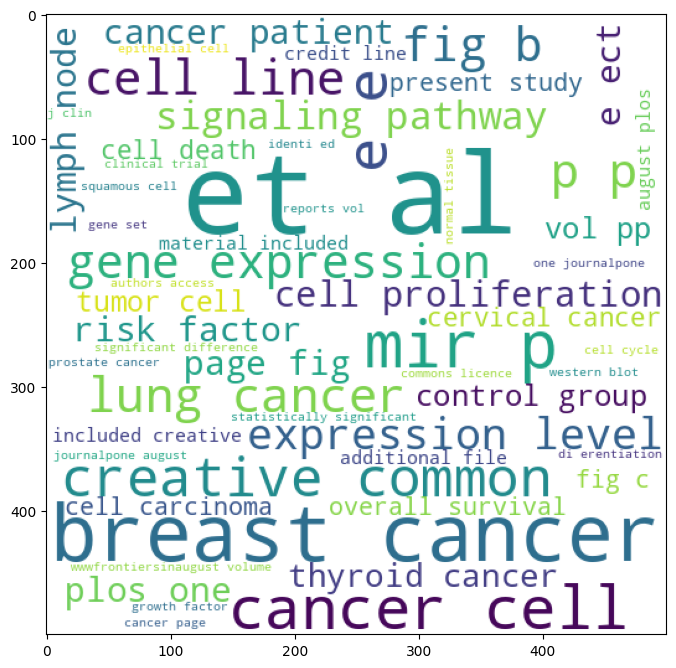

In [ ]:
plt.figure(figsize=(8,10))
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')
w_c=wc.generate(df_med[df_med['cancer_type']==0]['text'].str.cat(sep=" "))
plt.imshow(w_c)

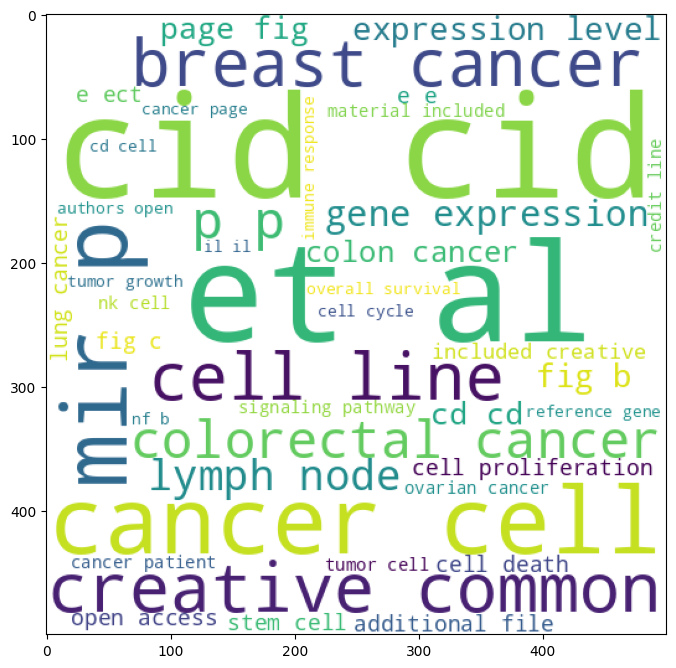

In [ ]:
plt.figure(figsize=(8,10))
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')
w_c=wc.generate(df_med[df_med['cancer_type']==1]['text'].str.cat(sep=" "))
plt.imshow(w_c)

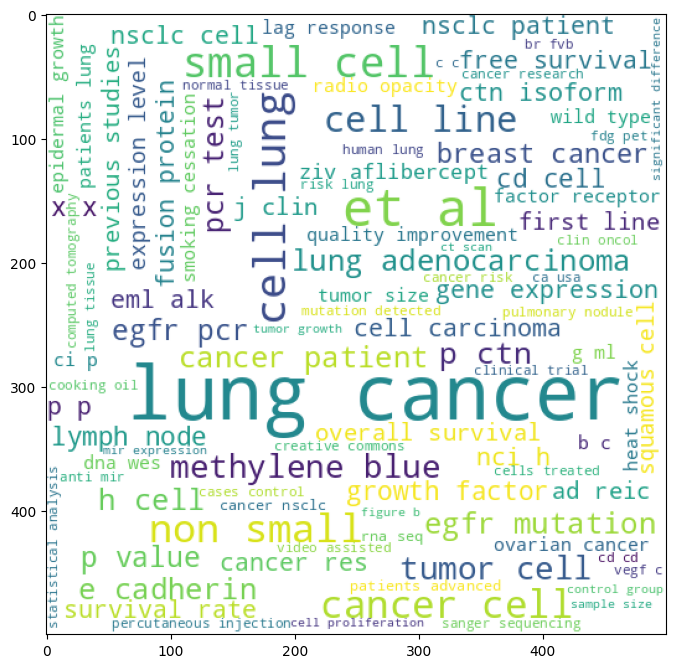

In [ ]:
plt.figure(figsize=(8,10))
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')
w_c=wc.generate(df_med[df_med['cancer_type']==2]['text'].str.cat(sep=" "))
plt.imshow(w_c)

# **🩻 Chest X-Ray Report Dataset**

In [ ]:
df_XRay= pd.read_csv('Chest XRay Report.csv')
df_XRay.head()

,id,Findings,Abnormal_Lungs,Abnormal_Heart,Damaged_Ribs,Other_Region
0,1,Lung fields appear normal. Both hila and vascu...,0,0,0,0
1,2,PA view radiograph of chest shows sternotomy s...,1,0,0,0
2,3,Lung fields appear normal. Both hila and vascu...,0,0,0,0
3,4,AP view radiograph of abdomen shows normal fla...,0,0,0,1
4,5,PA view radiograph of chest shows sternotomy s...,1,0,0,0


In [ ]:
df_XRay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              470 non-null    int64 
 1   Findings        470 non-null    object
 2   Abnormal_Lungs  470 non-null    int64 
 3   Abnormal_Heart  470 non-null    int64 
 4   Damaged_Ribs    470 non-null    int64 
 5   Other_Region    470 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 22.2+ KB


In [ ]:
df_XRay.shape

(470, 6)

In [ ]:
df_XRay.isnull().sum()

id                0
Findings          0
Abnormal_Lungs    0
Abnormal_Heart    0
Damaged_Ribs      0
Other_Region      0
dtype: int64

In [ ]:
df_XRay.columns

Index(['id', 'Findings', 'Abnormal_Lungs', 'Abnormal_Heart', 'Damaged_Ribs',
       'Other_Region'],
      dtype='object')

In [ ]:
# drop unnecessary columns
df_XRay.drop(columns= ['id','Abnormal_Heart', 'Damaged_Ribs','Other_Region'], inplace=True)

Numbers of patients has abnormal lungs: 278
Numbers of patients has normal lungs: 192


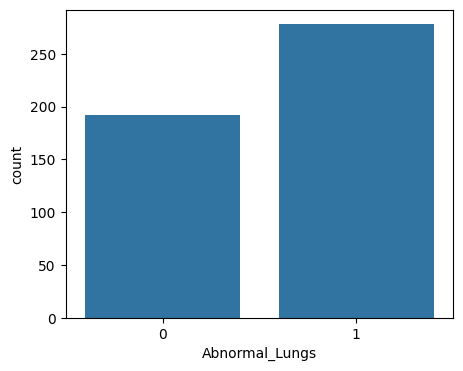

In [ ]:
plt.figure(figsize = (5,4))
sns.countplot(data=df_XRay, x=df_XRay.Abnormal_Lungs)
N, ABN = df_XRay.Abnormal_Lungs.value_counts()
print(f'Numbers of patients has abnormal lungs: {N}')
print(f'Numbers of patients has normal lungs: {ABN}')

We are using the same text preprocessing method (The function we built earlier)  to clean the text.

In [ ]:
df_XRay['clean_Findings'] = df_XRay.Findings.apply(clean_text)
df_XRay[['Findings','clean_Findings']].head()

,Findings,clean_Findings
0,Lung fields appear normal. Both hila and vascu...,lung fields appear normal hila vascular markin...
1,PA view radiograph of chest shows sternotomy s...,pa view radiograph chest shows sternotomy sutu...
2,Lung fields appear normal. Both hila and vascu...,lung fields appear normal hila vascular markin...
3,AP view radiograph of abdomen shows normal fla...,ap view radiograph abdomen shows normal flank ...
4,PA view radiograph of chest shows sternotomy s...,pa view radiograph chest shows sternotomy sutu...


In [ ]:
df_XRay = df_XRay.drop(columns= 'Findings',axis=1)
df_XRay.head()

,Abnormal_Lungs,clean_Findings
0,0,lung fields appear normal hila vascular markin...
1,1,pa view radiograph chest shows sternotomy sutu...
2,0,lung fields appear normal hila vascular markin...
3,0,ap view radiograph abdomen shows normal flank ...
4,1,pa view radiograph chest shows sternotomy sutu...


In [ ]:
df_XRay['character_counts']= df_XRay['clean_Findings'].str.len()
df_XRay['word_counts']= df_XRay['clean_Findings'].apply(lambda x:len(word_tokenize(x)))
df_XRay['sent_counts']= df_XRay['clean_Findings'].apply(lambda x:len(sent_tokenize(x)))
df_XRay.head()

,Abnormal_Lungs,clean_Findings,character_counts,word_counts,sent_counts
0,0,lung fields appear normal hila vascular markin...,189,25,1
1,1,pa view radiograph chest shows sternotomy sutu...,169,24,1
2,0,lung fields appear normal hila vascular markin...,154,21,1
3,0,ap view radiograph abdomen shows normal flank ...,219,30,1
4,1,pa view radiograph chest shows sternotomy sutu...,180,26,1


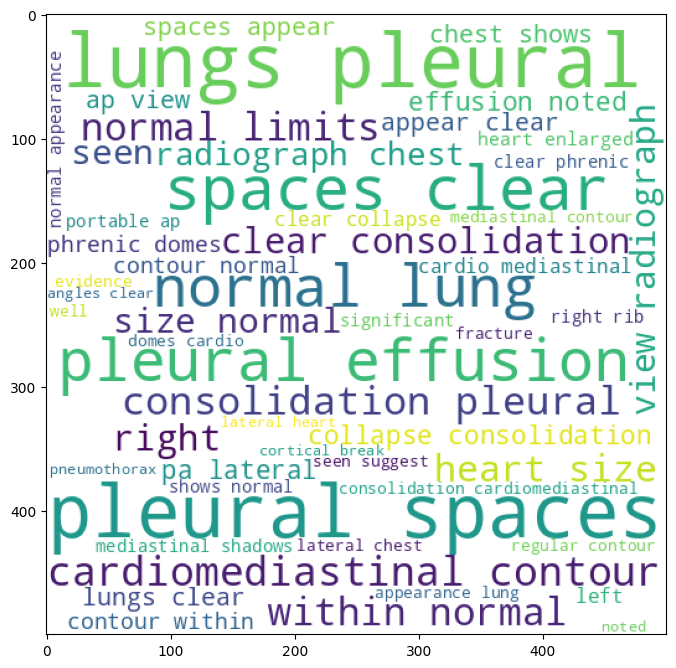

In [ ]:
plt.figure(figsize=(8,10))
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')
w_c=wc.generate(df_XRay[df_XRay['Abnormal_Lungs']==0]['clean_Findings'].str.cat(sep=" "))
plt.imshow(w_c)

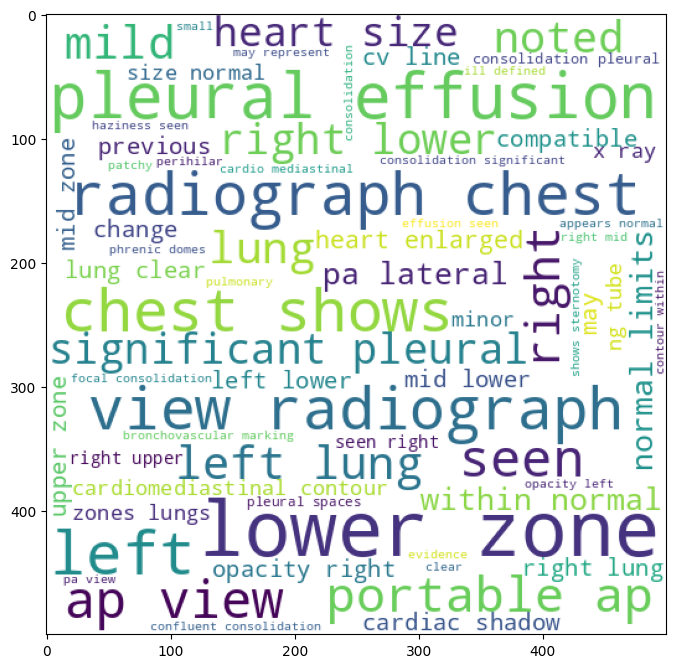

In [ ]:
plt.figure(figsize=(8,10))
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')
w_c=wc.generate(df_XRay[df_XRay['Abnormal_Lungs']==1]['clean_Findings'].str.cat(sep=" "))
plt.imshow(w_c)

# **🦾 Time to fit and predict the model**

Since the data (text) from both data sources had to be splitted and vectorized, I chose to use function to return the variables we are going to use for model fitting, training and testing.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
def split_and_vectorize(x, y):
  x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.25, random_state= 53)
  #return x_train, x_test, y_train, y_test (when i return these 4 variables, vectorizer doesn't work!)
  vectorize =  TfidfVectorizer(stop_words="english", max_df=0.7)
  tfidf_train= vectorize.fit_transform(x_train)
  tfidf_test= vectorize.transform(x_test)
  return x_train, tfidf_train, tfidf_test, y_train, y_test


x_Med= df_med.text
y_Med= df_med.cancer_type
x_XRay = df_XRay.clean_Findings
y_XRay = df_XRay.Abnormal_Lungs

x_Med_train, tfidf_Med_train, tfidf_Med_test,y_Med_train, y_Med_test =  split_and_vectorize(x_Med, y_Med)
x_XRay_train, tfidf_XRay_train, tfidf_XRay_test,y_XRay_train, y_XRay_test =  split_and_vectorize(x_XRay, y_XRay)

In [ ]:
# make sure the data is vectorized
tfidf_XRay_train

<117x553 sparse matrix of type '<class 'numpy.float64'>'
	with 2540 stored elements in Compressed Sparse Row format>

The model we are training here is Naive Bayes, which is commonly used for text/document classification.

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

def NB_model(dataname, tfidf_train, y_train):
  nb = nb_classifier.fit(tfidf_train, y_train)
  print(f'score of {dataname} NB training model: ' , nb.score(tfidf_train, y_train))

NB_model('Medical text dataset', tfidf_Med_train, y_Med_train)
NB_model('xRay report dataset',tfidf_XRay_train, y_XRay_train)

score of Medical text dataset NB training model:  0.9254756871035941
score of xRay report dataset NB training model:  0.9316239316239316


In [ ]:
# classification report and accuracy score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def classReportAccu(dataname, tfidf_train, y_train, tfidf_test, y_test):
  from sklearn.naive_bayes import MultinomialNB
  nb_classifier = MultinomialNB()
  nb = nb_classifier.fit(tfidf_train, y_train)
  classificationReport = classification_report(y_test, nb.predict(tfidf_test))
  accuScore = accuracy_score(y_test, nb.predict(tfidf_test)).round(2)



  print(f'This NB score belongs to : {dataname}')
  print()
  print(classificationReport)
  print(f'accuracy score is {accuScore}')
  return accuScore




accuScore1 = classReportAccu('Medical text dataset', tfidf_Med_train, y_Med_train, tfidf_Med_test, y_Med_test)
accuScore2 = classReportAccu('xRay report dataset', tfidf_XRay_train, y_XRay_train, tfidf_XRay_test, y_XRay_test)

This NB score belongs to : Medical text dataset

              precision    recall  f1-score   support

           0       0.77      0.93      0.84      2099
           1       0.90      0.73      0.81      1941
           2       1.00      0.95      0.97      1638

    accuracy                           0.87      5678
   macro avg       0.89      0.87      0.87      5678
weighted avg       0.88      0.87      0.87      5678

accuracy score is 0.87
This NB score belongs to : xRay report dataset

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       134
           1       0.92      0.84      0.88       219

    accuracy                           0.85       353
   macro avg       0.84      0.86      0.85       353
weighted avg       0.86      0.85      0.85       353

accuracy score is 0.85


In [ ]:
dic = {'dataset':['Medical text report', 'xRay report'],'score': [accuScore1, accuScore2]}
df = pd.DataFrame(data=dic)
df.set_index('dataset', inplace=True)
df


,score
dataset,
Medical text report,0.87
xRay report,0.85


<Axes: title={'center': 'Accuracy Across Models'}, xlabel='Accurarcy Score', ylabel='Dataset'>

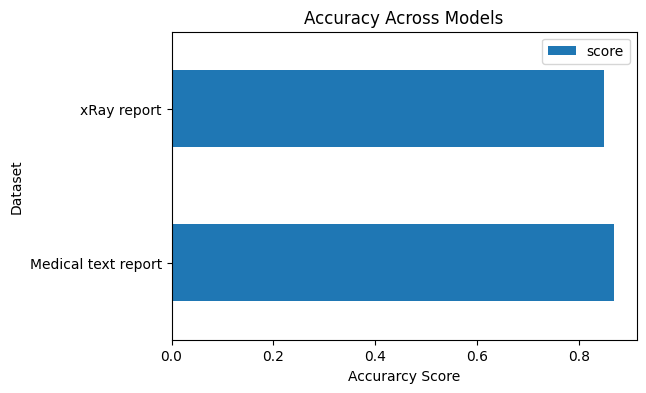

In [ ]:
df.plot(kind = 'barh', title= 'Accuracy Across Models', ylabel = 'Dataset', xlabel = 'Accurarcy Score',figsize=(6,4))

# **🎰 Ready for Deployment**

Now, we want to create an input for users to enter text. So we can predict outcome from the data users enter.

In [ ]:
def vectorize_factory(data, x_train, tfidf_train, y_train, tfidf_test):
  vectorize =  TfidfVectorizer(stop_words="english", max_df=0.7)
  tfidf_train= vectorize.fit_transform(x_train)
  #transform description into numeric
  tfidf_test = vectorize.transform([data])
  # time to predict with our medel!
  from sklearn.naive_bayes import MultinomialNB
  nb_classifier = MultinomialNB()
  nb_classifier.fit(tfidf_train, y_train)
  predict_answer = nb_classifier.predict(tfidf_test)


  #instead of printing out the number, we want the genre name
  if data == user_med:
    if predict_answer == 0:
      print("This medical text is classified as'Thyroid Cancer'." )
    if predict_answer == 1:
      print("This medical text is classified as'Colon Cancer'." )
    if predict_answer == 2:
      print("This medical text is classified as'Lung Cancer'." )
  if data == user_xRay:
    if predict_answer == 0:
      print("This xRay report shows that this patient has 'normal' lung.")
    if predict_answer == 1:
      print("This xRay report shows that this patient has 'abnormal' lung.")


#Choose what type of data to predict
user_data = input('Please choose if you want to predict medical report or xRay report (Medical Report/xRay Report): ').lower()
if user_data == 'medical report':
  user_med = input('Please enter the medical text: ')
  vectorize_factory(user_med, x_Med_train, tfidf_Med_train, y_Med_train,tfidf_Med_test)

elif user_data == 'xray report':
  user_xRay = input('Please enter the xRay report: ')
  vectorize_factory(user_xRay, x_XRay_train, tfidf_XRay_train, y_XRay_train,tfidf_XRay_test)

else:
  print('Please enter valid choice.')

Please choose if you want to predict medical report or xRay report (Medical Report/xRay Report): xRay Report
Please enter the xRay report: Lung fields show non homogenous opacities in the right lower zone . Right hemidiaphragm is elevated. Both hila and vascular markings are normal. Mediastinum is central. No cardiomegaly. Both CP angles are free. Both hemidiaphragm are normal. Rib cage and spine appears normal. IMPRESSION:   Consolidation right lower zone.
This xRay report shows that this patient has 'abnormal' lung.
